In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mnist = fetch_mldata('MNIST original', data_home='.')

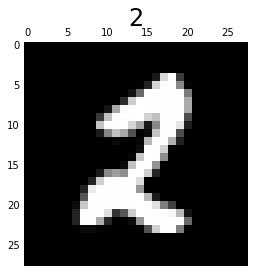

In [57]:
idx = 15102
pic = mnist.data[idx].reshape(28,28)
tar = int( mnist.target[idx] )
plt.matshow(pic, cmap='gray')
plt.title(tar,fontsize=24)

In [100]:
def sigmoid(x):
    return 1./(1.+np.exp(-x))
# end def

In [250]:
avg = mnist.data.mean(axis=0)

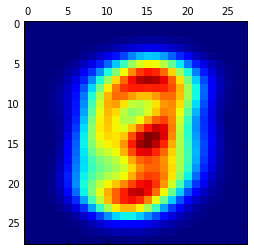

In [254]:
plt.matshow(avg.reshape(28,28))

In [349]:
# binary restricted Bolzmann machine
# Hinton contrastic divergence training

# initialize model
nvis = 28*28
nhid = 10
ntrain = 60000

W = 0.01*np.random.randn(nhid,nvis)
a = avg # shift of visible units
b = -4.*np.ones(nhid) # shift of hidden units

trace = np.zeros(ntrain)
# train model
eps = 2.0 # learning rate
for isample in range(ntrain):
    entry = mnist.data[isample]
    # make entry a binary vector
    in_vec= np.zeros(nvis)
    in_vec[ np.where( entry/256.>=0.5 ) ] = 1
    
    # make output a binary vector
    target  = int( mnist.target[isample] )
    out_vec = np.zeros(nhid)
    out_vec[target] = 1
    
    # calculate <v \outer h>_data
    h_data = np.zeros(nhid)
    idx = np.where( np.random.rand(nhid) - sigmoid(np.dot(W,in_vec)+b) < 0 )
    h_data[idx] = 1
    
    trace[isample] = target
    
    W_data = np.outer(out_vec,in_vec)
    
    # calculate <v \outer h>_model
    v_model = np.zeros(nvis)
    idx = np.where( np.random.rand(nvis) - sigmoid(np.dot(h_data,W)+a) < 0 )
    v_model[idx] = 1
    
    h_model = np.zeros(nhid)
    idx = np.where( np.random.rand(nhid) - sigmoid(np.dot(W,v_model)+b) < 0 )
    h_model[idx] = 1
    
    W_model = np.outer(h_model,v_model)
    
    W += eps*(W_data-W_model)
    a += eps*(v_data-v_model)
    b += eps*(h_data-h_model)
    
    # given current M,a,b, and v -> sample h
    # given current M,a,b, and h -> sample v'
    #  Delta W = eps*(vh^T-v'h'^T) i.e. data - model
    #  Delta a = eps*(v-v')
    #  Delta b = eps*(h-h')
# end for isample

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


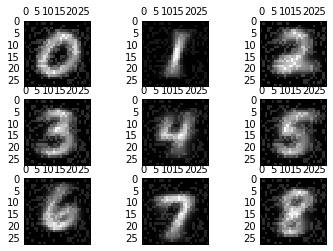

In [356]:
# weight vectors
fig,ax = plt.subplots(3,3)

for ix in range(3):
    for iy in range(3):
        inum = ix*3+iy
        myax = ax[ix][iy]
        myax.matshow( W[inum].reshape(28,28), cmap='gray')
    # end for iy
# end for ix